# Introduction to Machine Learning - Exercise 3
* The aim of the exercise is to learn how to use distance metrics and k-NN classifier.

<!-- ![meme02](https://github.com/rasvob/EFREI-Introduction-to-Machine-Learning/blob/main/images/fml_02_meme_02.png?raw=true) -->

## Import used packages

In [1]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use
from sklearn.neighbors import KNeighborsClassifier # k-nearest neighbors
from sklearn.model_selection import train_test_split # split data into training and testing sets
from sklearn.metrics import accuracy_score # accuracy

## Load the data into the Pandas DataFrame - in our case it is a csv file
* https://raw.githubusercontent.com/rasvob/EFREI-Introduction-to-Machine-Learning/blob/main//datasets/iris.csv

![meme02](https://github.com/rasvob/EFREI-Introduction-to-Machine-Learning/blob/main/images/knn_iris.png?raw=true)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rasvob/EFREI-Introduction-to-Machine-Learning/main/datasets/iris.csv', sep=',')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# We will take a look at the data first

<Axes: xlabel='species', ylabel='sepal_length'>

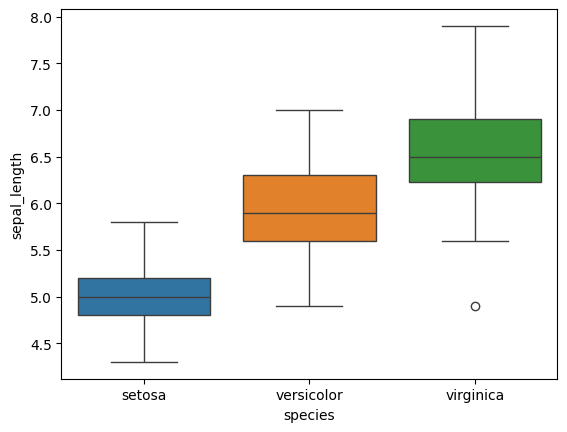

In [6]:
sns.boxplot(data=df, x='species', y='sepal_length', hue='species')

<Axes: xlabel='species', ylabel='sepal_width'>

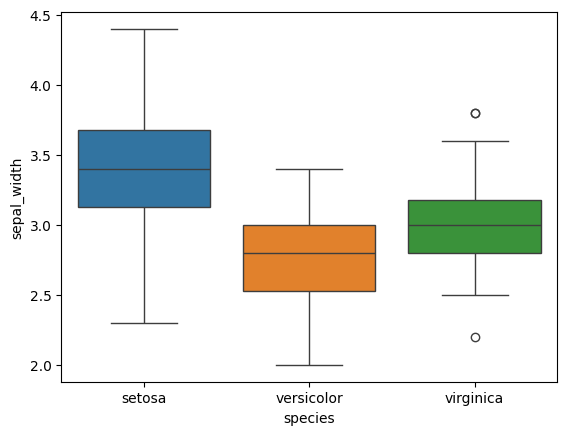

In [7]:
sns.boxplot(data=df, x='species', y='sepal_width', hue='species')

<Axes: xlabel='species', ylabel='petal_length'>

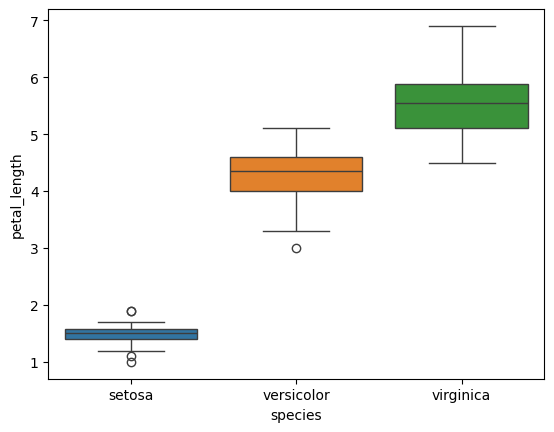

In [8]:
sns.boxplot(data=df, x='species', y='petal_length', hue='species')

<Axes: xlabel='species', ylabel='petal_width'>

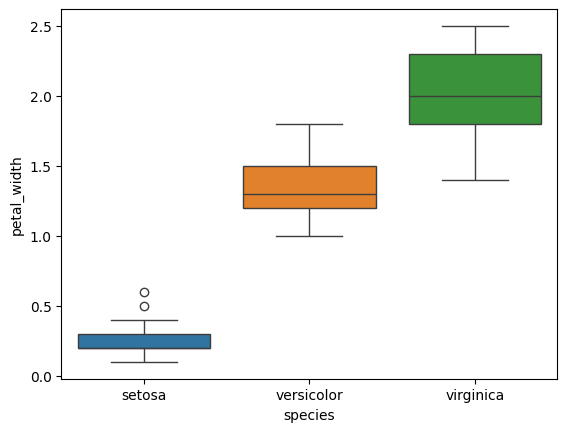

In [9]:
sns.boxplot(data=df, x='species', y='petal_width', hue='species')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

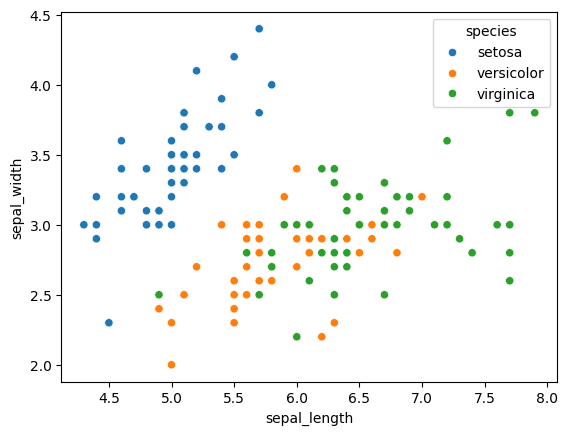

In [10]:
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

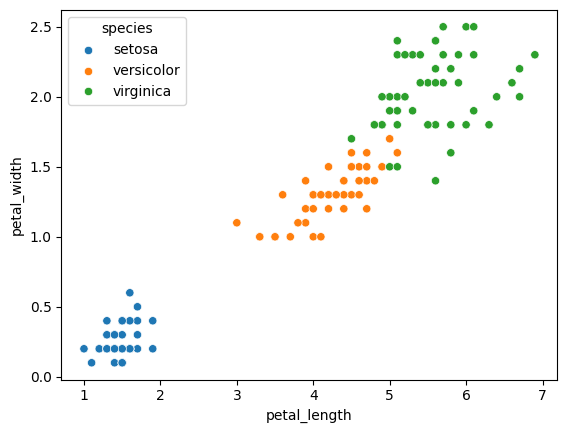

In [11]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')

# ✅ Task - k-NN
- 💡 aaa